# 聚合：最小值、最大值和其他值

当你面对大量的数据时，第一个步骤通常都是计算相关数据的概括统计值。最常用的概括统
计值可能是均值和标准差，这两个值能让你分别概括出数据集中的“经典”值，但是其他一
些形式的聚合也是非常有用的（如求和、乘积、中位数、最小值和最大值、分位数，等等）。
NumPy 有非常快速的内置聚合函数可用于数组，我们将介绍其中的一些。

In [1]:
import numpy as np

## 数组值求和

先来看一个小例子，设想计算一个数组中所有元素的和。Python 本身可用内置的sum 函数
来实现：

In [2]:
L = np.random.random(100)
sum(L)

55.63955337522146

它的语法和NumPy 的sum 函数非常相似，并且在这个简单的例子中的结果也是一样的：

In [3]:
np.sum(L)

55.63955337522145

但是，因为NumPy 的sum 函数在编译码中执行操作，所以NumPy 的操作计算得更
快一些：

In [4]:
big_array = np.random.rand(10**7)
%time sum(big_array)
%time np.sum(big_array)

Wall time: 735 ms
Wall time: 11 ms


4998567.816574175

但是需要注意，sum 函数和np.sum 函数并不等同，这有时会导致混淆。尤其是它们各自
的可选参数都有不同的含义，np.sum 函数是知道数组的维度的，这一点将在接下来的部
分讲解。

## 最小值和最大值

同样，Python 也有内置的min 函数和max 函数，分别被用于获取给定数组的最小值和最
大值：

In [5]:
min(big_array), max(big_array)

(1.380666065919911e-07, 0.9999999463231817)

NumPy 对应的函数也有类似的语法，并且也执行得更快：

In [6]:
np.min(big_array), np.max(big_array)

(1.380666065919911e-07, 0.9999999463231817)

In [7]:
%time min(big_array)
%time np.min(big_array)

Wall time: 531 ms
Wall time: 4.97 ms


1.380666065919911e-07

对于min、max、sum 和其他NumPy 聚合，一种更简洁的语法形式是数组对象直接调用这些
方法：

In [8]:
print(big_array.min(), big_array.max(), big_array.sum())

1.380666065919911e-07 0.9999999463231817 4998567.816574175


当你操作NumPy 数组时，确保你执行的是NumPy 版本的聚合。

## 多维度聚合
一种常用的聚合操作是沿着一行或一列聚合。例如，假设你有一些数据存储在二维数组中：

In [9]:
M = np.random.random((3, 4))
M

array([[0.31353431, 0.5962176 , 0.17014265, 0.31197818],
       [0.50175677, 0.48239603, 0.57720406, 0.59137969],
       [0.6431697 , 0.00832504, 0.3287869 , 0.6450076 ]])

默认情况下，每一个NumPy 聚合函数将会返回对整个数组的聚合结果：

In [10]:
M.sum()

5.169898536146273

聚合函数还有一个参数，用于指定沿着哪个轴的方向进行聚合。例如，可以通过指定
axis=0 找到每一列的最小值：

In [11]:
M.min(axis=0)

array([0.31353431, 0.00832504, 0.17014265, 0.31197818])

这个函数返回四个值，对应四列数字的计算值。

同样，也可以找到每一行的最大值：

In [12]:
M.max(axis=1)

array([0.5962176 , 0.59137969, 0.6450076 ])

其他语言的用户会对轴的指定方式比较困惑。axis 关键字指定的是数组将会被折叠的维
度，而不是将要返回的维度。因此指定axis=0 意味着第一个轴将要被折叠——对于二维数
组，这意味着每一列的值都将被聚合。

## 2. 其他聚合函数
NumPy 提供了很多其他聚合函数，但是这里不会详细地介绍它们。另外，大多数的聚合都
有对NaN 值的安全处理策略（NaN-safe），即计算时忽略所有的缺失值，这些缺失值即特殊
的IEEE 浮点型NaN 值。有些NaN-safe 的函数直到NumPy 1.8 版本才加进去，所以更早版本的NumPy 并不支持此功能。

NumPy中可用的聚合函数


| 函数名称      | NaN安全版本      | 描述                     |
| ------------- | ---------------- | ------------------------ |
| np.sum        | np.nansum        | 计算元素的和             |
| np.prod       | np.nanprod       | 计算元素的积             |
| np.mean       | np.nanmean       | 计算元素的平均值         |
| np.std        | np.nanstd        | 计算元素的标准差         |
| np.var        | np.nanvar        | 计算元素的方差           |
| np.min        | np.nanmin        | 找出最小值               |
| np.max        | np.nanmax        | 找出最大值               |
| np.argmin     | np.nanargmin     | 找出最小值的索引         |
| np.argmax     | np.nanargmax     | 找出最大值的索引         |
| np.median     | np.nanmedian     | 计算元素的中位数         |
| np.percentile | np.nanpercentile | 计算基于元素排序的统计值 |
| np.any        | N/A              | 验证任何一个元素是否为真 |
| np.all        | N/A              | 验证所有元素是否为真     |

## 示例：美国总统的身高是多少
用NumPy 的聚合功能来概括一组数据非常有用。这里举一个简单的例子——计算所有美
国总统的身高。这个数据在president_heights.csv 文件中，是一个简单的用逗号分隔的标签
和值的列表：

我们将用Pandas 包来读文件并抽取身高信息。（请注意，身高的计量单位是厘米。）第3 章
将更全面地介绍Pandas：

In [13]:
import pandas as pd
data = pd.read_csv(r'./data/president_heights.csv')
heights = np.array(data['height(cm)'])
heights

array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175,
       178, 183, 193, 178, 173, 174, 183, 183, 168, 170, 178, 182, 180,
       183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 177, 185, 188,
       188, 182, 185], dtype=int64)

有了这个数据数组后，就可以计算很多概括统计值了：

In [14]:
print("Mean height: ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height: ", heights.min())
print("Maximum height: ", heights.max())

Mean height:  179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:  163
Maximum height:  193


请注意，在这个例子中，聚合操作将整个数组缩减到单个概括值，这个概括值给出了这些
数值的分布信息。我们也可以计算分位数：

In [15]:
print("25th percentile: ", np.percentile(heights, 25))
print("Median: ", np.median(heights))
print("75th percentile: ", np.percentile(heights, 75))

25th percentile:  174.25
Median:  182.0
75th percentile:  183.0


可以看到，美国总统的身高中位数是182cm，或者说不到6 英尺。

当然，有些时候将数据可视化更有用。这时可以先进行一个快速的可视化，通过Matplotlib
用以下代码创建图：

In [16]:
import matplotlib.pyplot as plt

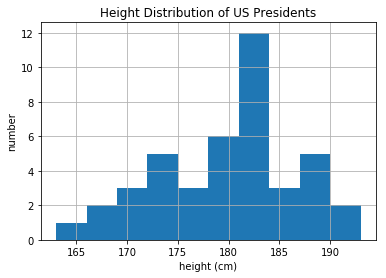

In [17]:
fig, ax = plt.subplots()

ax.set(xlabel='height (cm)', ylabel='number',title='Height Distribution of US Presidents')
ax.hist(heights)
ax.grid()

这些聚合是探索数据分析的一些最基本片段，本书后续的章节将进行更深入的介绍。